
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## S1: Introduction

**`Dataset:`** No-show appointments


### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- **`PatientId`**: Identification of patient ID.  
- **`AppointmentID`**: Identification of appointment ID.
- **`Gender`**: Male or Female     
- **`ScheduledDay`**: Date/Time the patient set up their appointment.
- **`AppointmentDay`**:  indicates the date/time the patient called to book their appointment.
- **`Age`**: indicates the patient's age.
- **`Neighborhood`**: indicates the location of the hospital.
- **`Scholarship`**: True of False.
- **`Hipertension`**: True of False.
- **`Diabetes`**: True of False.
- **`Alcoholism`**: True of False.
- **`Handcap`**: True of False.
- **`SMS_received`**: True of False.
- **`Show-up`**: True of False.



In [10]:
#Import the needed packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import operator

%matplotlib inline

print(" $$ Mission Successfull $$")

 $$ Mission Successfull $$


In [11]:
#I needed to install pandas.
!pip install pandas

<a id='wrangling'></a>
## S2: Data Wrangling


### A. General Properties
- **`A.1`** Dimensions.
    **`A.2`** Rows & Columns.
    **`A.3`** Data types.

### **`A.1`** Dimensions.

In [12]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [13]:
df.shape

(110527, 14)

### **`A.2 & 3`** Rows, Columns and Data Types

In [14]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


--**DESC**-- 

This dataset has **14** different data type columns and **110527** data rows.
1. In the next cells, i will identify the data format and types (Quantitative vs. Categorical) of each column to help plan and determine the best data analysis strategy to approach this dataset.
    
2. In order to do that:
        2.1 I will present the dataframe data using matplotlib hist() function .
        2.2 I will identify the data type using Pandas unique() function to confirm the data type and decide on the type of analysis i will conduct.

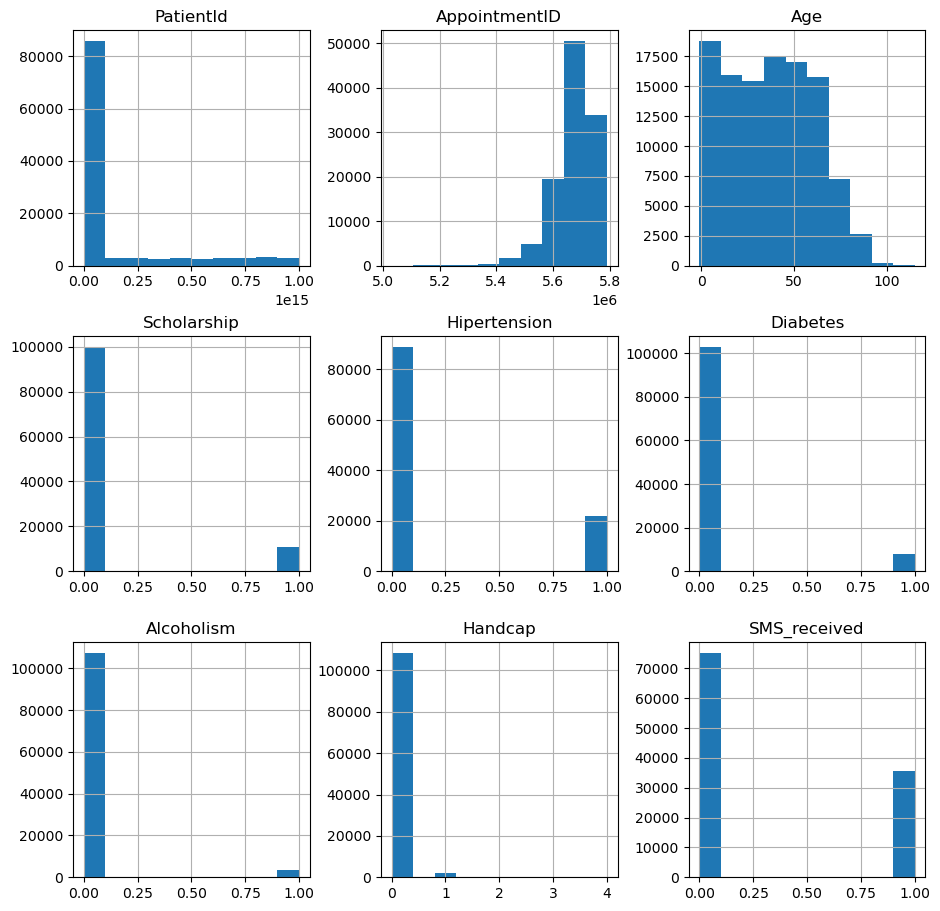

In [15]:
df.hist(figsize=(11, 11));

Next, we will identify the exact types of each column and confirm the data analysis strategy for each column.

### 2. Missing/Duplicated/Incorrect Data Validation

#### 2.1 Missing Values Validation

In [16]:
# I will check now any missing values

if(df.isnull().sum().any())==False:
    print("Results: There are no missing values.")
else:
    print("Check again.")

Results: There are no missing values.


#### 2.2 Duplicated Values Validation

In [17]:
#Lets check for any row duplications:

print("Results: There are #", df.duplicated().sum(), "duplicates rows.") 

Results: There are # 0 duplicates rows.


In [18]:
#Lets check for any PatientId duplicates:
print("There are #", df.PatientId.duplicated().sum(), "duplicated PatientId.")

There are # 48228 duplicated PatientId.


In [19]:
#Lets check for the AppointmentID unique rows:

print("There are #", df.AppointmentID.nunique(), "unique AppointmentID.")

There are # 110527 unique AppointmentID.


In [20]:
#Lets check the top 5 booked patients:

print("The Top 5 Patients are:"'\n', df.PatientId.value_counts().head(5))

The Top 5 Patients are:
 8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
Name: PatientId, dtype: int64


--**DESC**--

Looking at the cells above, i noted that the PatientId column contains repeated values which means same patients booked more than an appointment; looking at the output of the **value_counts() function**, i noted the **top 5 patients** that booked the biggest number of appointments. 

#### 2.3 Incorrect Data Validation (Depending on the nature of each column)

In [21]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [22]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


I noticed that there is Age value with "-1" , let's change it after to 0 in the next cleaning section:

In [23]:
df.groupby(['Age', 'PatientId'])['Age'].count()

Age   PatientId   
-1    4.659432e+14    1
 0    2.699191e+08    2
      3.424788e+08    1
      4.279622e+08    1
      1.192462e+09    1
                     ..
 100  5.578313e+13    1
 102  2.342836e+11    1
      9.762948e+14    1
 115  3.196321e+13    4
      7.482346e+14    1
Name: Age, Length: 63467, dtype: int64

There are 2 Patients with age 115, which acceptable. 

In [24]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

I found that Handcap is categorical variable , whichas example the patient can have 4 different handicaps.

In [25]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

There are different 81 locations, with various number of booked appointments. It's more convenient to categorize it. 

--**DESC**-- 
After checking all the dataset. I can say that there is no missing values despite the following the data issues:

1- I will drop the AppointmentID column

2- Also some columns names need to be correctly renamed.

3- I will change the wrong Age "-1" value to "0".

4- Some needs to change the category type: **Handcap, Neighbourhood and Gender**.

5- All date columns need to be changed to datetime type.

6- Change some columns to bool type: such as (Scholarship, Hypertension, Diabetes, Alcoholism, SMSreceived, NoShow).

### 3. Data Cleaning

In [26]:
# 1- I will drop the AppointmentID column from the dataset

df.drop(['AppointmentID'], axis=1, inplace=True)

In [27]:
# 2- Also some columns names need to be correctly renamed.
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSreceived', 'No-show': 'NoShow'},
          inplace=True)

# let's check the Changes:
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
# After dropping the AppointmentID column, let's check the dataset & present a rondom rows:
print("There are #", df.duplicated().sum(), "duplicates.")
df_dup = df[df.duplicated()]
df_dup.head(5)

There are # 618 duplicates.


,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
154,1.925263e+10,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
369,4.341600e+14,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,4.497415e+09,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
466,5.161239e+12,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
554,4.916356e+12,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes


There are 618 duplicate values, which maybe the patient can get scheduled more than a time. So let's deal with it as separated appointments.

In [29]:
# 3- I will change the wrong Age "-1" value to "0", then check the values.
df['Age'].replace({-1: 0}, inplace=True)

df['Age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [30]:
# 4- Some needs to change the category type: Handicap, Neighbourhood and Gender.
for c in ['Handicap', 'Neighbourhood', 'Gender']:
    df[c] = df[c].astype('category')

In [31]:
# 5- All date columns need to be changed to datetime type.
for c in['ScheduledDay', 'AppointmentDay']:
    df[c]= pd.to_datetime(df[c])

In [32]:
# 6- Change some columns to bool type: such as (Scholarship, Hypertension, Diabetes, Alcoholism, SMSreceived, NoShow).
for c in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMSreceived']:
    df[c]= df[c].astype('bool')
    
# Regarding NoShow need to change the values first , then the type, as below:
df['NoShow'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['NoShow']= df['NoShow'].astype('bool')

# I will create a mask for the people who came
Showed = df['NoShow'] == 0
NotShowed = df['NoShow'] ==1
df['Showed'] = Showed
df['NotShowed'] = NotShowed

In [33]:
# Let's check the dataset types after the previous changes:
df.dtypes

PatientId                     float64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                     category
SMSreceived                      bool
NoShow                           bool
Showed                           bool
NotShowed                        bool
dtype: object

In [34]:
# Let's check the columns summary:

df.describe(include='all', datetime_is_numeric=True)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Showed,NotShowed
count,1.105270e+05,110527,110527,110527,110527.000000,110527,110527,110527,110527,110527,110527.0,110527,110527,110527,110527
unique,NaN,2,NaN,NaN,NaN,81,2,2,2,2,5.0,2,2,2,2
top,NaN,F,NaN,NaN,NaN,JARDIM CAMBURI,False,False,False,False,0.0,False,False,True,False
freq,NaN,71840,NaN,NaN,NaN,7717,99666,88726,102584,107167,108286.0,75045,88208,88208,88208
mean,1.474963e+14,NaN,2016-05-09 07:49:15.846273024+00:00,2016-05-19 00:57:50.008233472+00:00,37.088883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.921784e+04,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.172614e+12,NaN,2016-04-29 10:27:01+00:00,2016-05-09 00:00:00+00:00,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.173184e+13,NaN,2016-05-10 12:13:17+00:00,2016-05-18 00:00:00+00:00,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.439172e+13,NaN,2016-05-20 11:18:37+00:00,2016-05-31 00:00:00+00:00,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.999816e+14,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Last check for the random rows after the data cleaned:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Showed,NotShowed
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False,True,False
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True,False
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False,True,False
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True,False
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False,True,False


<a id='eda'></a>
## Exploratory Data Analysis

I have to ask some questions to dig deep into our dataset:
1- What is the overall appointment categories ratio%?
2- Which group of patients Show up less?

### Research Question 1 (What is the overall appointment categories ratio%)

79.8067440534892


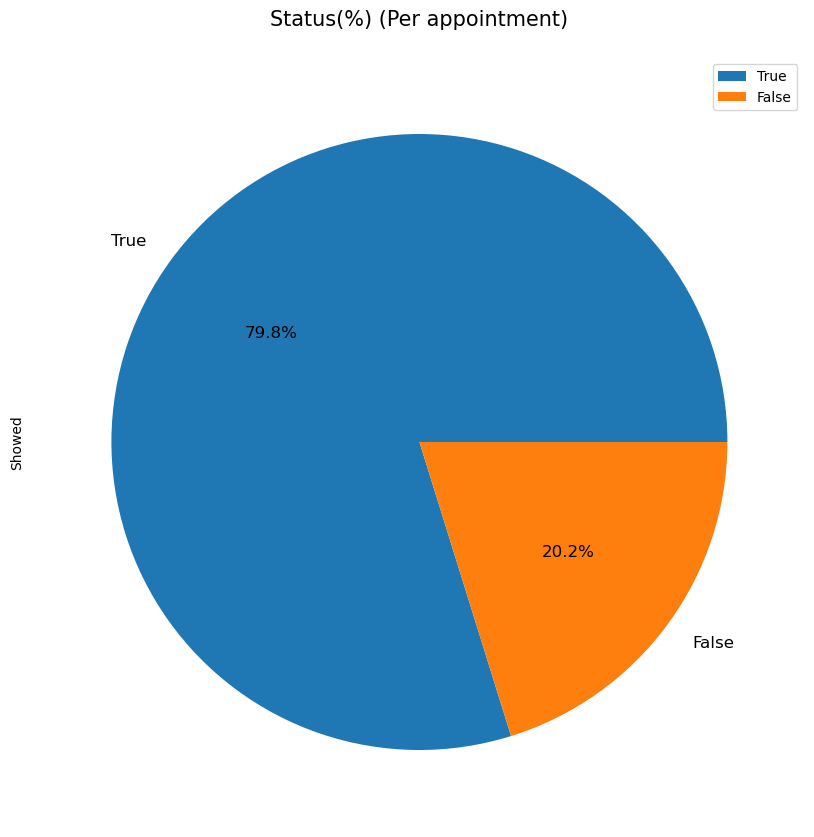

In [36]:
allP = df['Showed'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10, 10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + '(%) (Per appointment)\n', fontsize= 15);
plt.legend();

### Research Question 2  (Which group of patients Show up less)

In [37]:
# Using Countplot function:

def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette = gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g

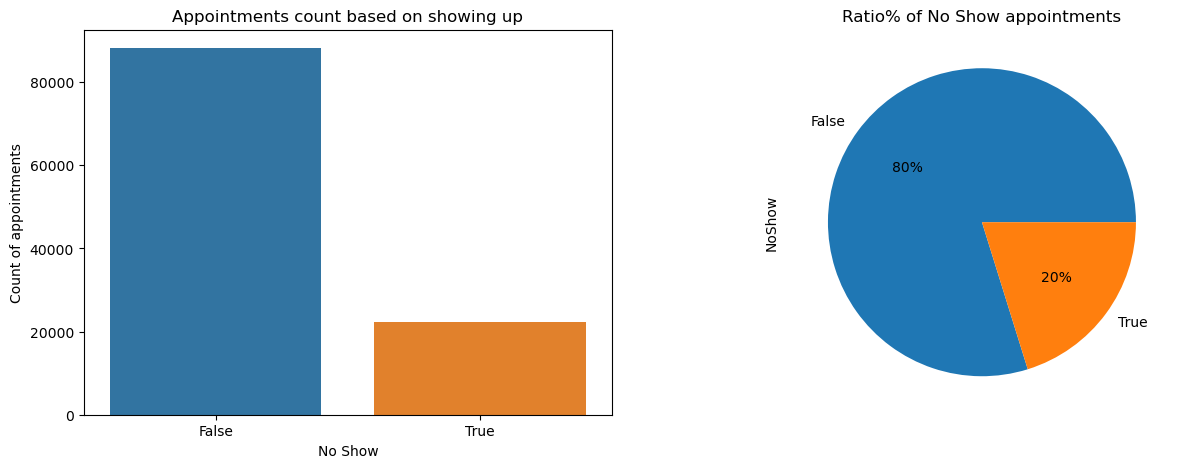

In [38]:
# I will check the individual patient values and of our dependent variable NoShow share on all appointments.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'NoShow', 'No Show', 'Count of appointments', 'Appointments count based on showing up')

plt.subplot(1,2,2)
df.NoShow.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Ratio% of No Show appointments')
plt.show()

In [39]:
# Count the total of NoShows & the ratio:
NoShow_totals = df.groupby('NoShow').count()['Age']
NoShow_totals

NoShow
False    88208
True     22319
Name: Age, dtype: int64

In [40]:
# NoShow Ratio
NoShow_ratio = df['NoShow'].sum() / len(df.index) * 100
print("There are %", NoShow_ratio, "didn't Show up.") 

There are % 20.193255946510806 didn't Show up.


In [48]:
# I will check the relation between variables by using the correlation:
df.corr(method='spearman', min_periods=1).style.background_gradient(cmap='Greens')

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSreceived,NoShow,Showed,NotShowed
PatientId,1.000000,-0.001669,-0.000545,0.002369,0.006359,0.007889,-0.008262,-0.000711,0.000711,-0.000711
Age,-0.001669,1.000000,-0.090099,0.503204,0.293320,0.102266,0.015389,-0.061228,0.061228,-0.061228
Scholarship,-0.000545,-0.090099,1.000000,-0.019729,-0.024894,0.035022,0.001194,0.029135,-0.029135,0.029135
Hypertension,0.002369,0.503204,-0.019729,1.000000,0.433086,0.087971,-0.006267,-0.035701,0.035701,-0.035701
Diabetes,0.006359,0.293320,-0.024894,0.433086,1.000000,0.018474,-0.014550,-0.015180,0.015180,-0.015180
Alcoholism,0.007889,0.102266,0.035022,0.087971,0.018474,1.000000,-0.026147,-0.000196,0.000196,-0.000196
SMSreceived,-0.008262,0.015389,0.001194,-0.006267,-0.014550,-0.026147,1.000000,0.126431,-0.126431,0.126431
NoShow,-0.000711,-0.061228,0.029135,-0.035701,-0.015180,-0.000196,0.126431,1.000000,-1.000000,1.000000
Showed,0.000711,0.061228,-0.029135,0.035701,0.015180,0.000196,-0.126431,-1.000000,1.000000,-1.000000
NotShowed,-0.000711,-0.061228,0.029135,-0.035701,-0.015180,-0.000196,0.126431,1.000000,-1.000000,1.000000


#### -- Correlation Observation--

We can see that the highest relation is for Hypertension with Age, Hypertension with Diabetes and Age with Diabetes. 

#### 1. Age correlation.

   >##### 1.a Age & Hypertension.
   

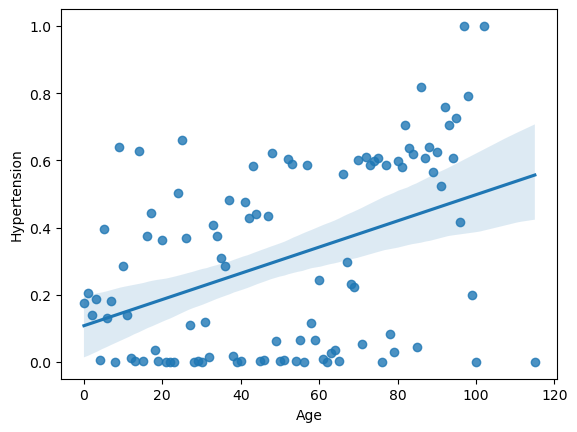

In [60]:
# Using sns.regplot to clearly present the correlation line. 
hypertension_mean = df['Hypertension'].groupby(df['Age']).mean()
Ages = df['Age'].unique()
sns.regplot(x=Ages, y = hypertension_mean)
plt.xlabel('Age')
plt.show()

   >##### 1.b Age & Diabetes.

<function matplotlib.pyplot.show(close=None, block=None)>

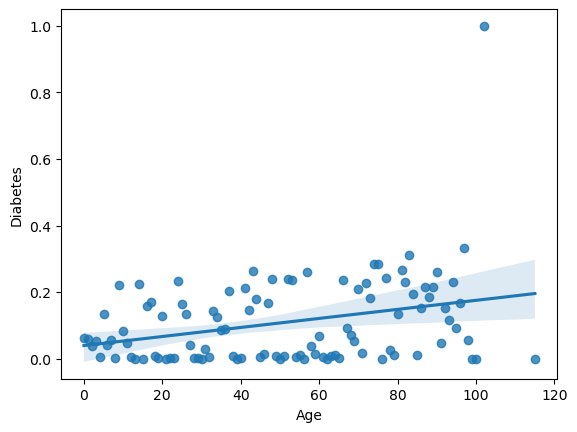

In [65]:
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
Ages = df['Age'].unique()
sns.regplot(x = Ages, y = diabetes_mean)
plt.xlabel('Age')
plt.show

In [68]:
# Let's check the outliers data:
df.query('Age >=99').head(15)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Showed,NotShowed
58014,9.762948e+14,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,False,False,False,False,0,False,False,True,False
63912,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True,False,True
63915,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True,False,True
68127,3.196321e+13,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True,False,True
76284,3.196321e+13,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,False,True,False
79270,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False,True,False
79272,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False,True,False
90372,2.342836e+11,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,False,False,False,False,0,False,False,True,False
92084,5.578313e+13,F,2016-05-06 14:55:36+00:00,2016-06-03 00:00:00+00:00,100,ANTÔNIO HONÓRIO,False,False,False,False,0,True,False,True,False
97647,3.661577e+10,F,2016-06-06 09:46:34+00:00,2016-06-06 00:00:00+00:00,99,SANTO ANTÔNIO,False,True,True,False,0,False,False,True,False


<function matplotlib.pyplot.show(close=None, block=None)>

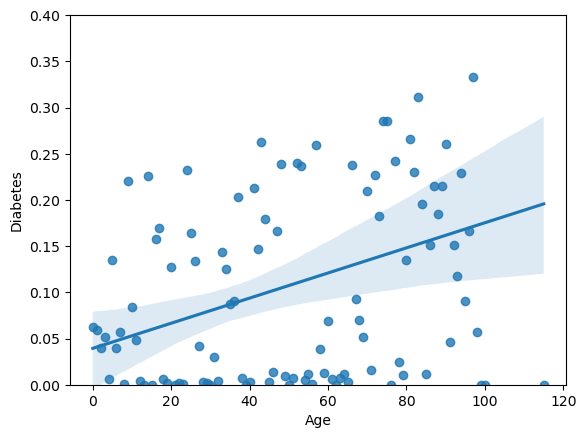

In [69]:
# let's remove the outlier & present the correlation again.
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
Ages = df['Age'].unique()
sns.regplot(x = Ages, y = diabetes_mean)
plt.xlabel('Age')
plt.ylim(0,0.4)
plt.show

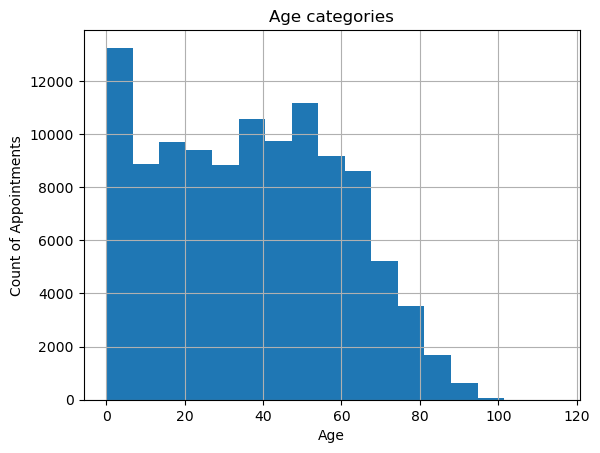

In [74]:
# i need to figure out the age categories:
g = df.Age.hist(bins=17);
g.set(xlabel = 'Age', ylabel = 'Count of Appointments', title = 'Age categories')
plt.show()

In [75]:
def bar_plot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    g=sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g

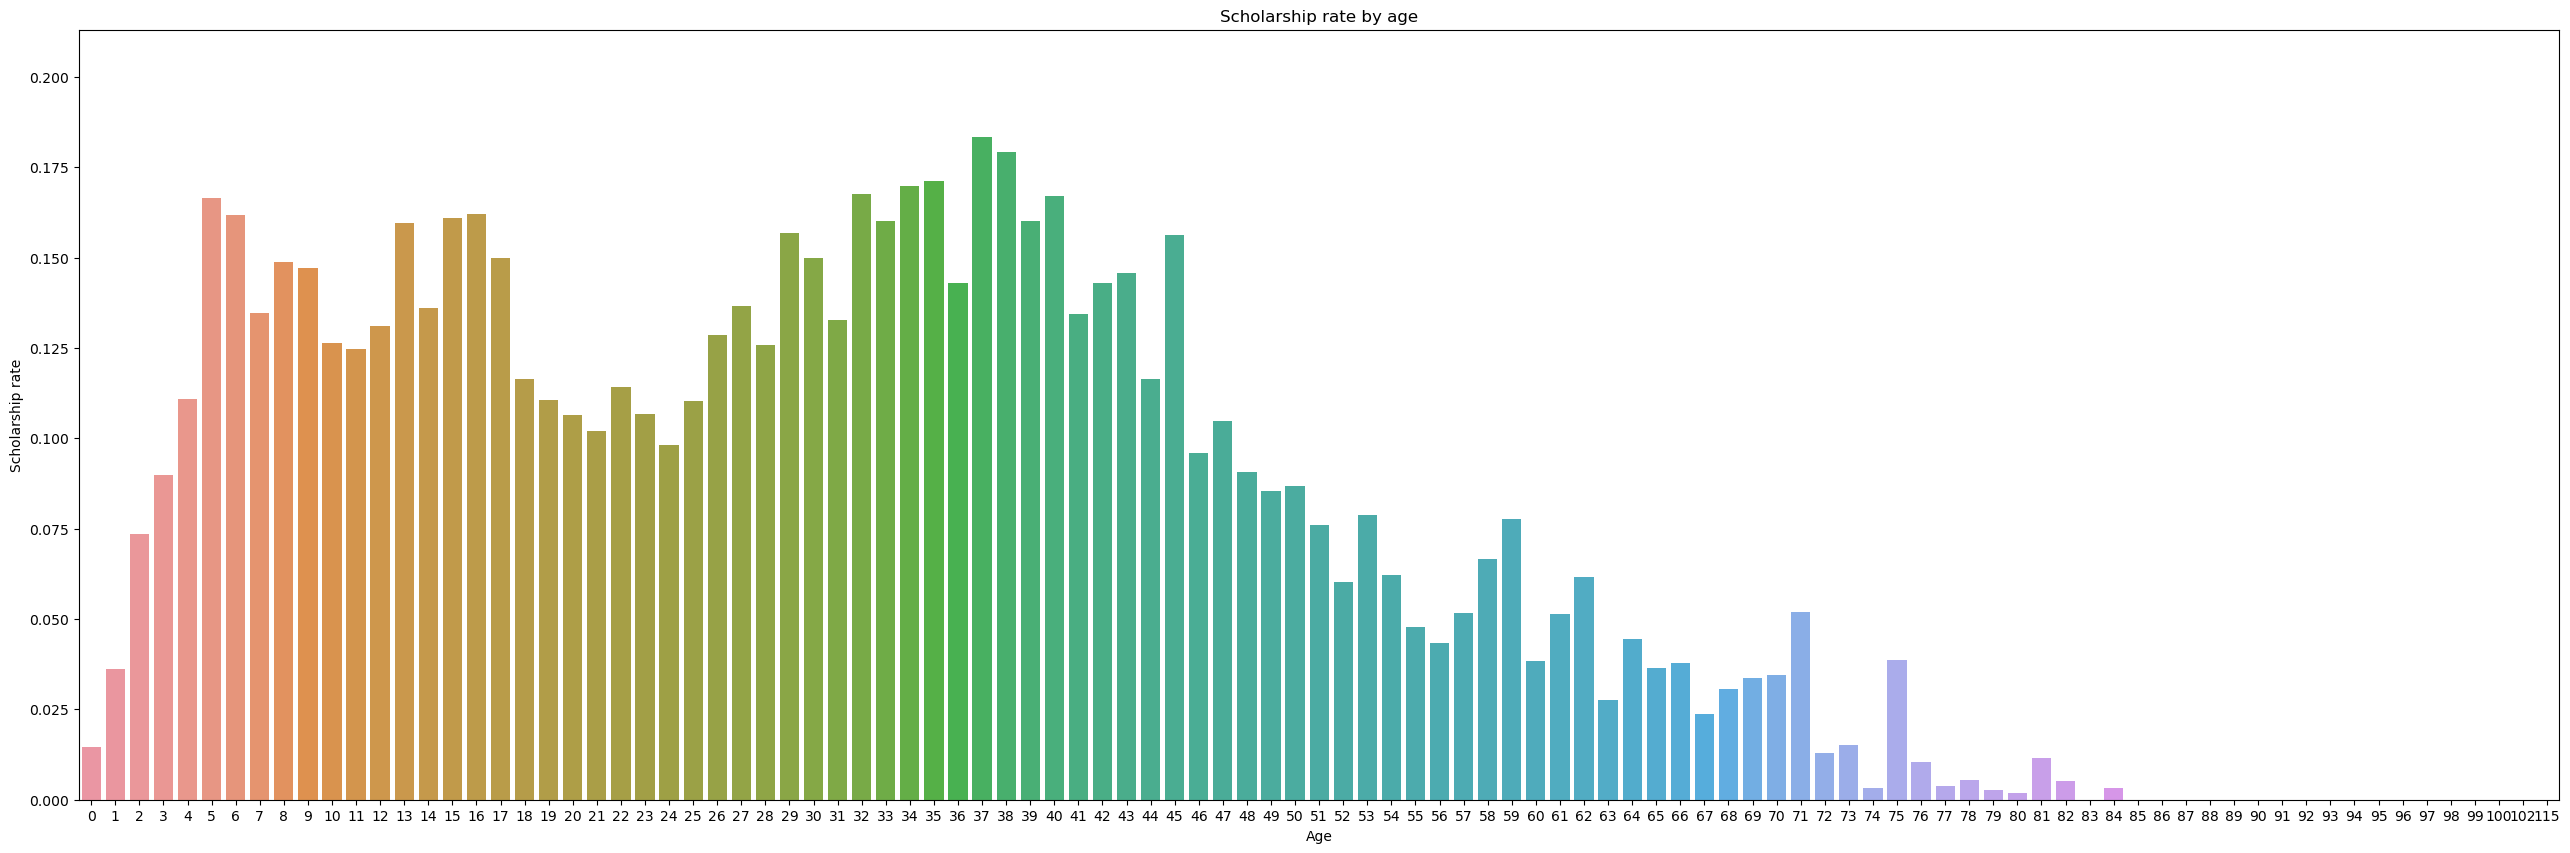

In [77]:
# Ratio of appointments for patients on scholership by age.
plt.figure(figsize=(32,10))
bar_plot(df['Age'], df['Scholarship'], 'Age', 'Scholarship rate', 'Scholarship rate by age', 0)
plt.show()

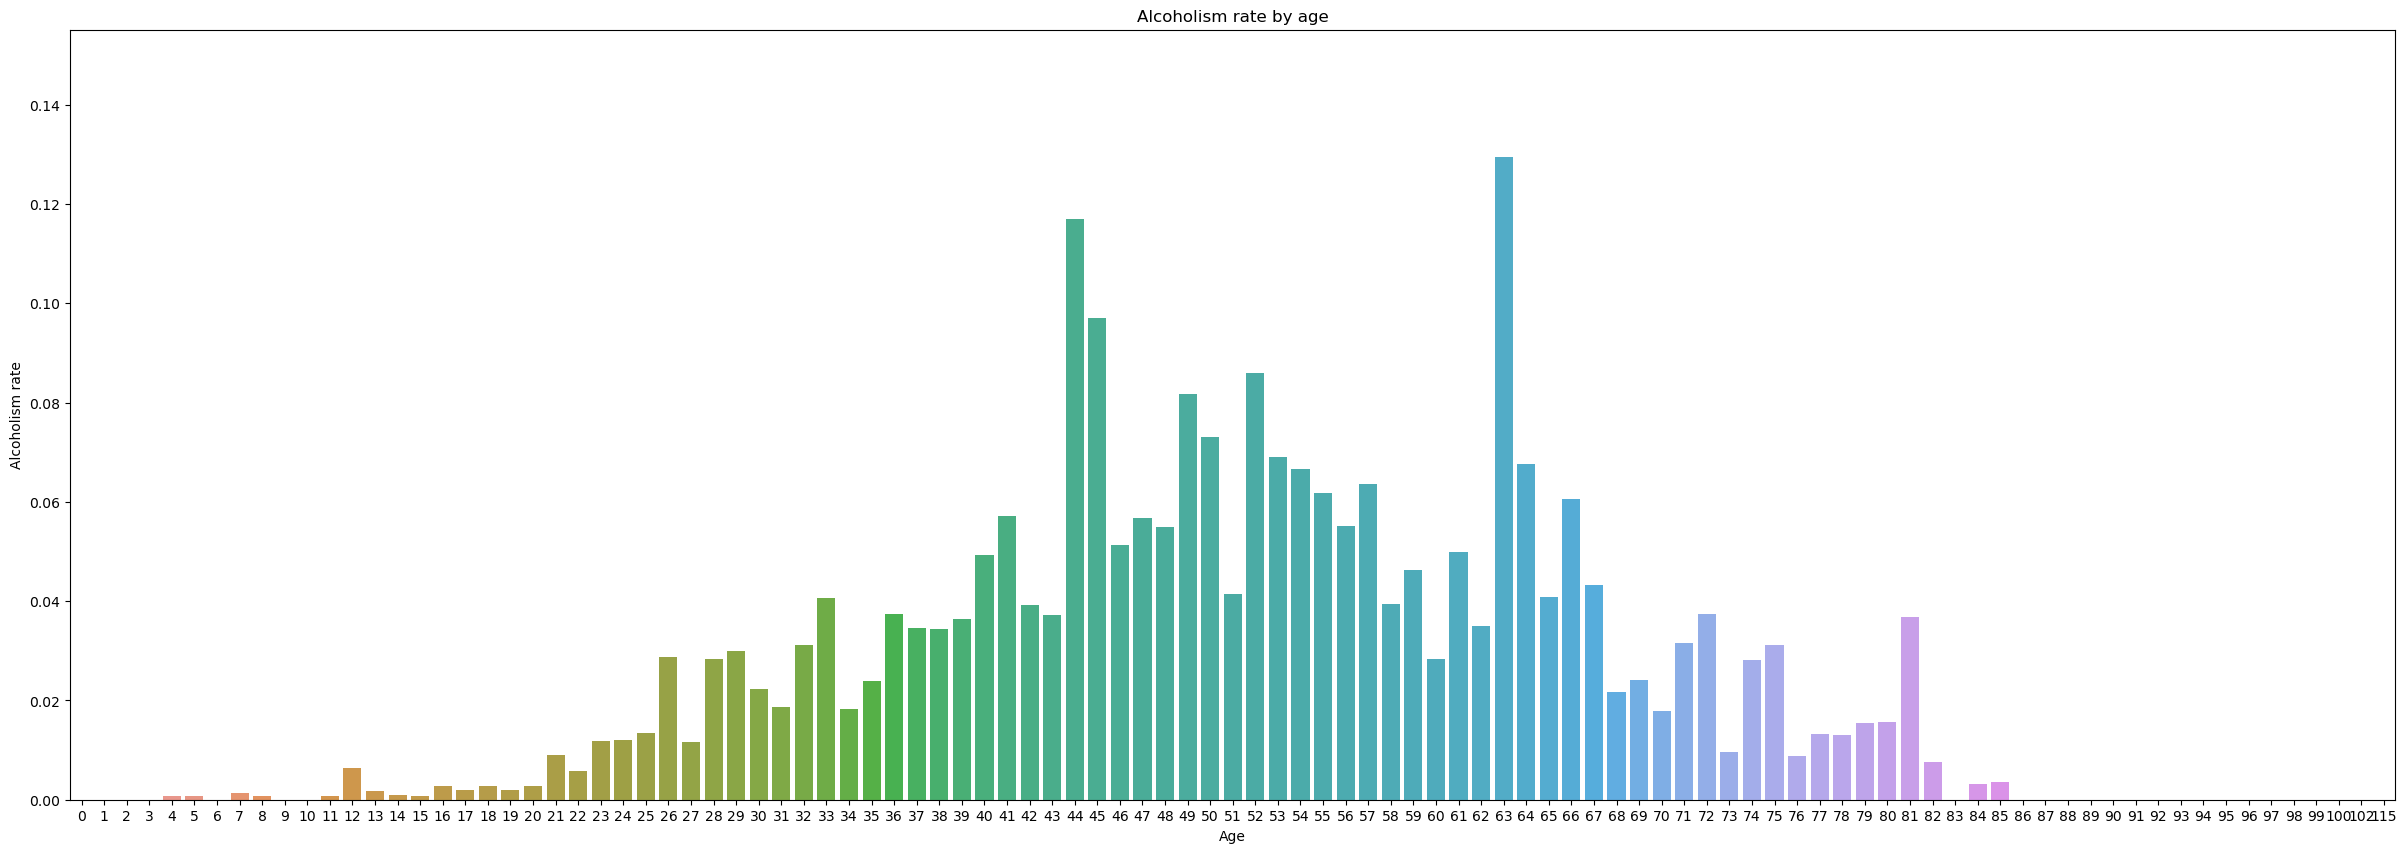

In [78]:
# let's discover how alcoholism is distributed between scheduling patients by age.
plt.figure(figsize=(30,10))
bar_plot(df['Age'], df['Alcoholism'], 'Age', 'Alcoholism rate', 'Alcoholism rate by age', 0)
plt.show()

The most values is between 40s and 60s.

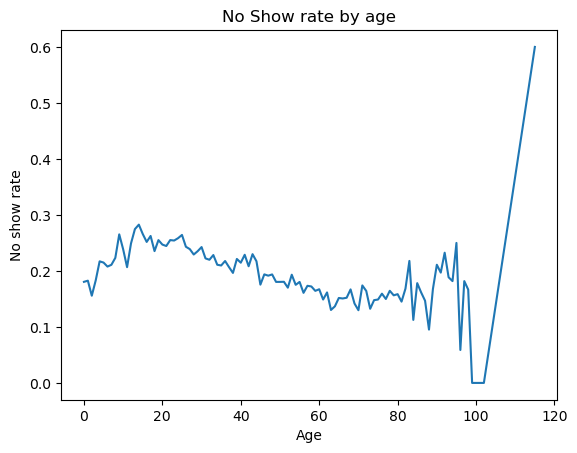

In [81]:
#We can see here a decreasing of now show ratio for age between 15 and 80.
y_means = df['NoShow'].groupby(df['Age']).mean()
x_age = df['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No Show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.show()

#### Handicaps

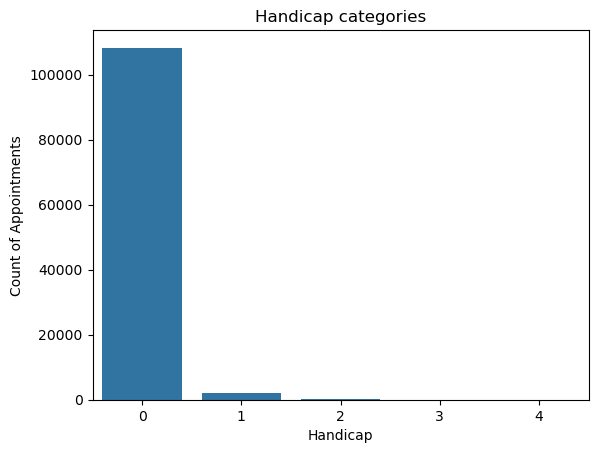

In [83]:
count_plot(df, 'Handicap', 'Handicap', 'Count of Appointments', 'Handicap categories', sns.color_palette()[0])
plt.show()

#### Neighbourhoods

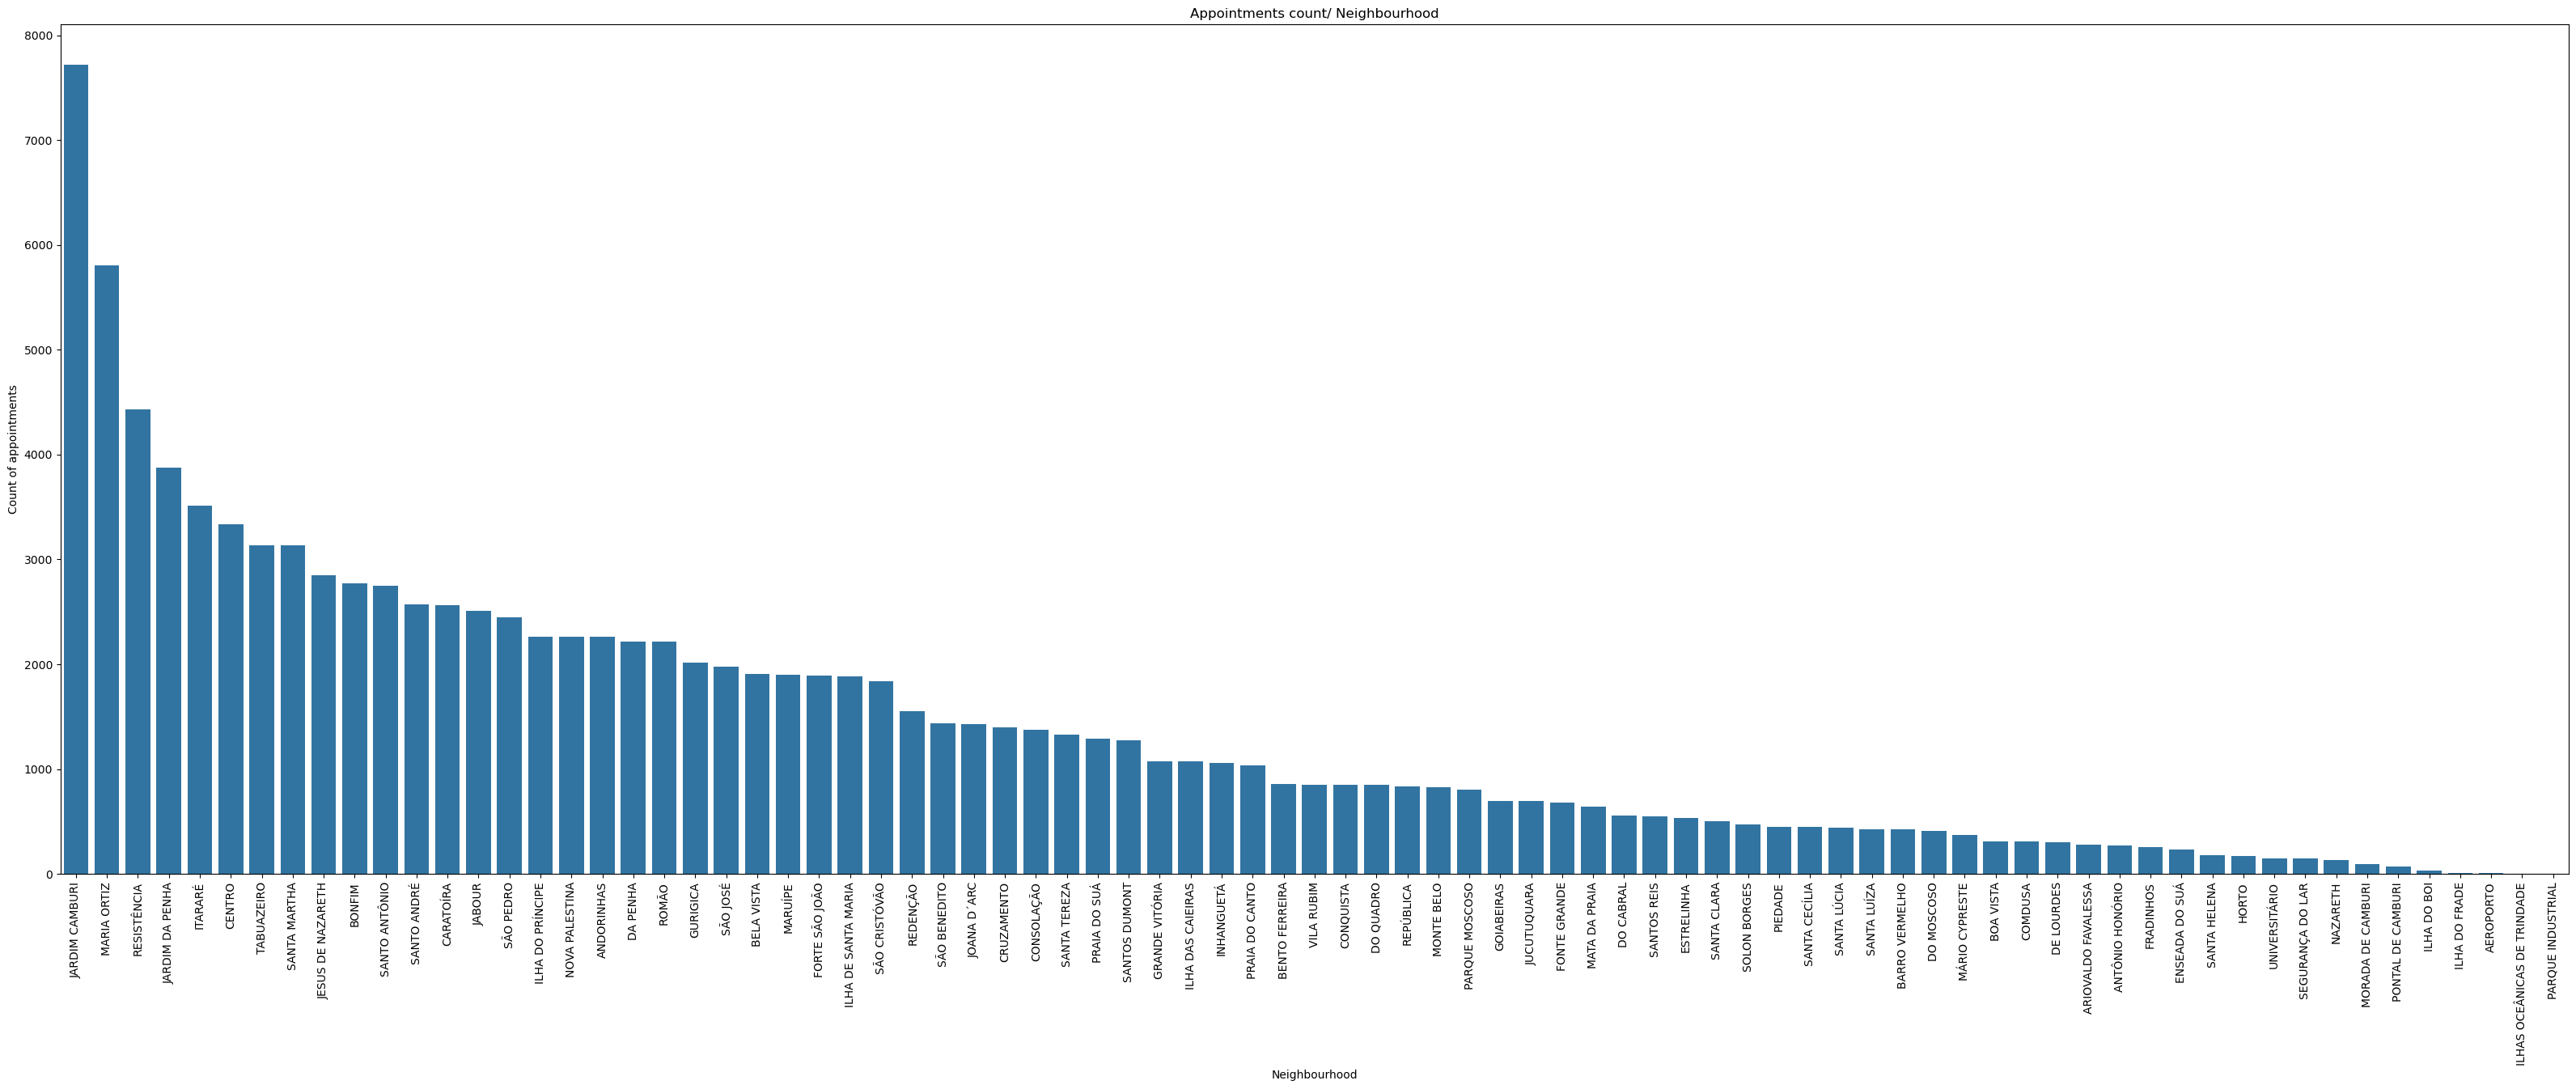

In [85]:
# Let's discover the Neighbourhoods distribution.
plt.figure(figsize=(40,30))

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
g = sns.countplot(data = df, x = 'Neighbourhood', order = df['Neighbourhood'].value_counts().index,
                 color=sns.color_palette()[0])
g.set(ylabel= 'Count of appointments', title = 'Appointments count/ Neighbourhood')

plt.show()

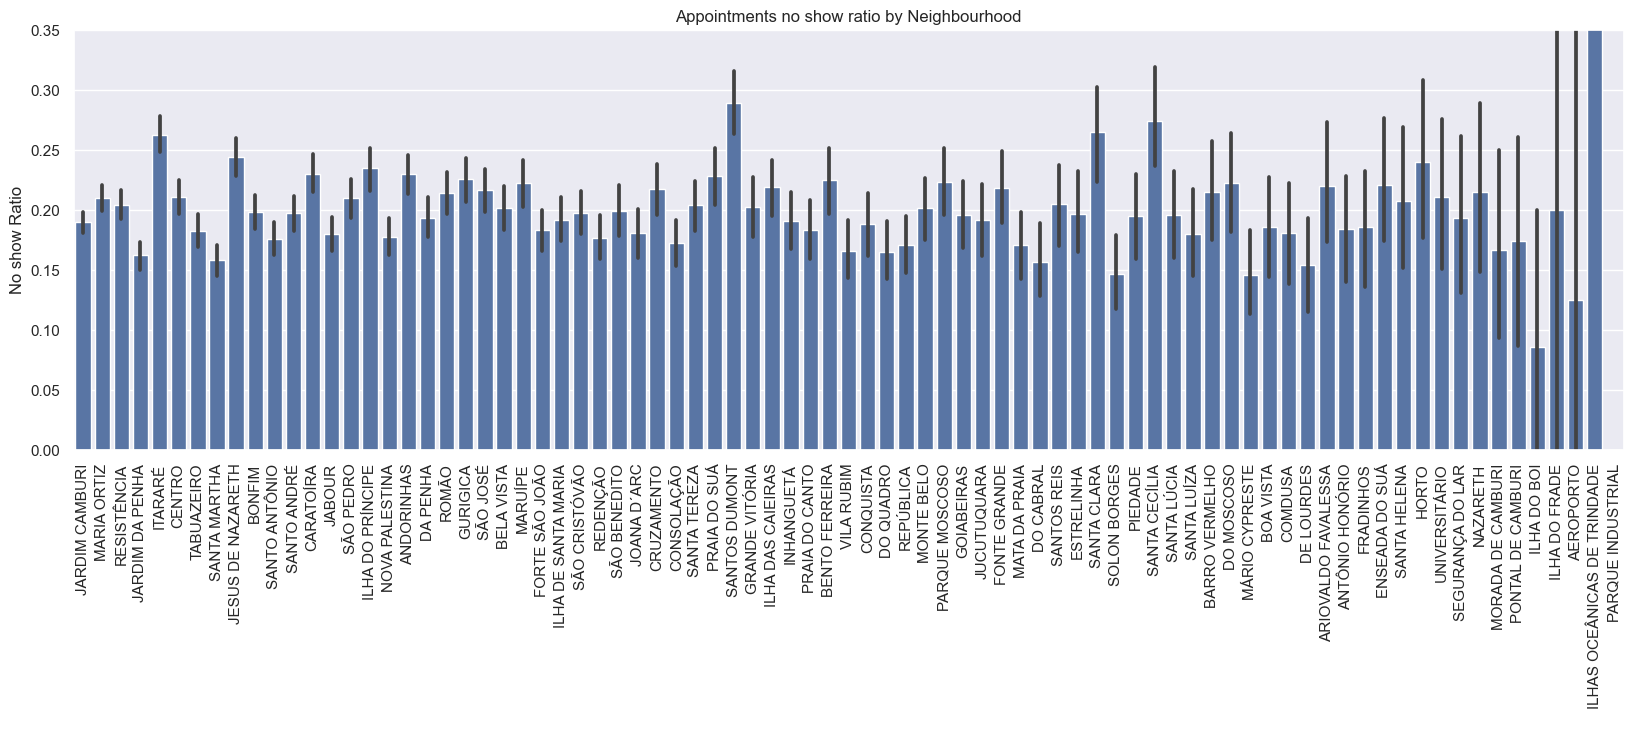

In [129]:
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
sns.set(rc={"figure.figsize":(20, 12)})
g = sns.barplot(x = df['Neighbourhood'], y = df['NoShow'], order = df['Neighbourhood'].value_counts().index, 
                 color=sns.color_palette()[0]);
g.set_title('Appointments no show ratio by Neighbourhood')
g.set(ylabel = 'No show Ratio', ylim=(0,0.35), xlabel=' ')
g.axhline(NoShow_ratio)

plt.show()

#### Gender

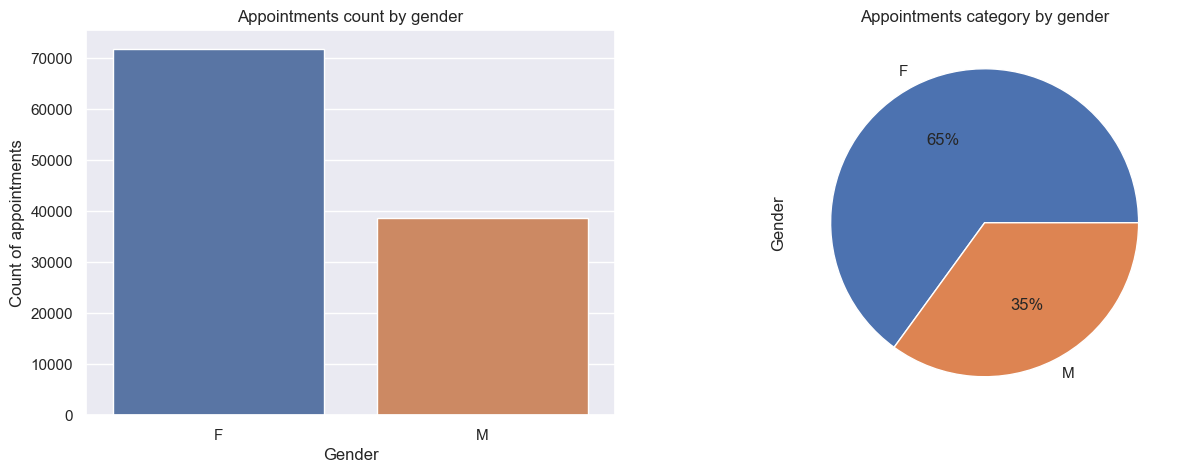

In [130]:
# Lets figure out the highest category scheduling:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', 'Appointments count by gender' )

plt.subplot(1, 2, 2)
g2 = df.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%')
g2.set(title = 'Appointments category by gender')

plt.show()

We can find here that the highest is **Females** to schedule.

Let'sgo further by count the no show for them.

In [136]:
# I will count the appointments per gender

gender_totals = df['Gender'].value_counts()
print("Appointments per Gender as below:", '\n', gender_totals)

Appointments per Gender as below: 
 F    71840
M    38687
Name: Gender, dtype: int64


In [137]:
# Now i will count the No Show by Gender

noshow_by_gender = df.groupby(['Gender', 'NoShow']).count()['Age']
print("No Show per Gender as below:", '\n', noshow_by_gender)

No Show per Gender as below: 
 Gender  NoShow
F       False     57246
        True      14594
M       False     30962
        True       7725
Name: Age, dtype: int64


In [138]:
# As the Female Share is higher, let's calculate the frequencies:
noshow_ratio_female = noshow_by_gender['F'] / gender_totals['F']
print("No Show ratio per Female as below:", '\n', noshow_ratio_female)

No Show ratio per Female as below: 
 NoShow
False    0.796854
True     0.203146
Name: Age, dtype: float64


In [139]:
# let's calculate the frequencies per male:
noshow_ratio_male = noshow_by_gender['M'] / gender_totals['M']
print("No Show ratio per Male as below:", '\n', noshow_ratio_male)

No Show ratio per Male as below: 
 NoShow
False    0.800321
True     0.199679
Name: Age, dtype: float64


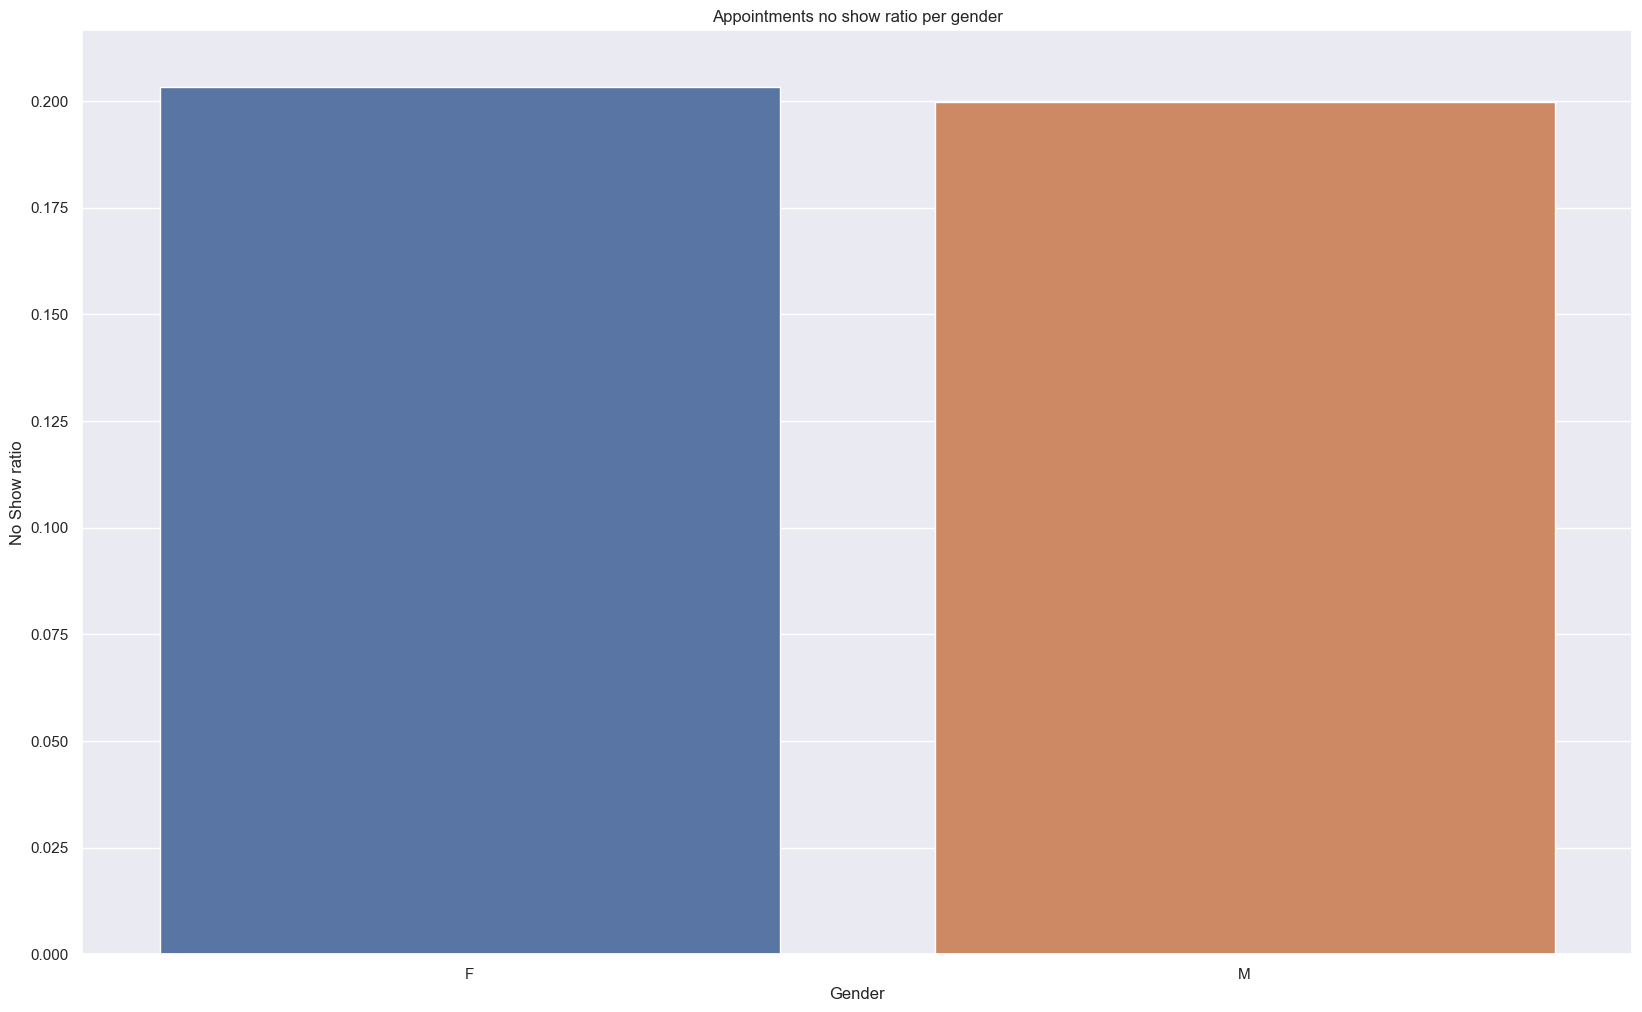

In [143]:
# Now let's present it:
bar_plot(df['Gender'], df['NoShow'], 'Gender', 'No Show ratio', 'Appointments no show ratio per gender', 0)
plt.show()

Really, It's small difference among Female & Male regarding the No Show ratio. 

### Research Question 3  (Effects of the weekend on the No Show frequency)

In [148]:
# Let's add the days to the data frame

dow = df['AppointmentDay'].dt.day_name()
df = df.assign(AppointmentDayOfWeek = dow)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Showed,NotShowed,AppointmentDayOfWeek
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False,True,False,Friday
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False,True,False,Friday
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False,True,False,Friday
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,True,False,Friday
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False,True,False,Friday


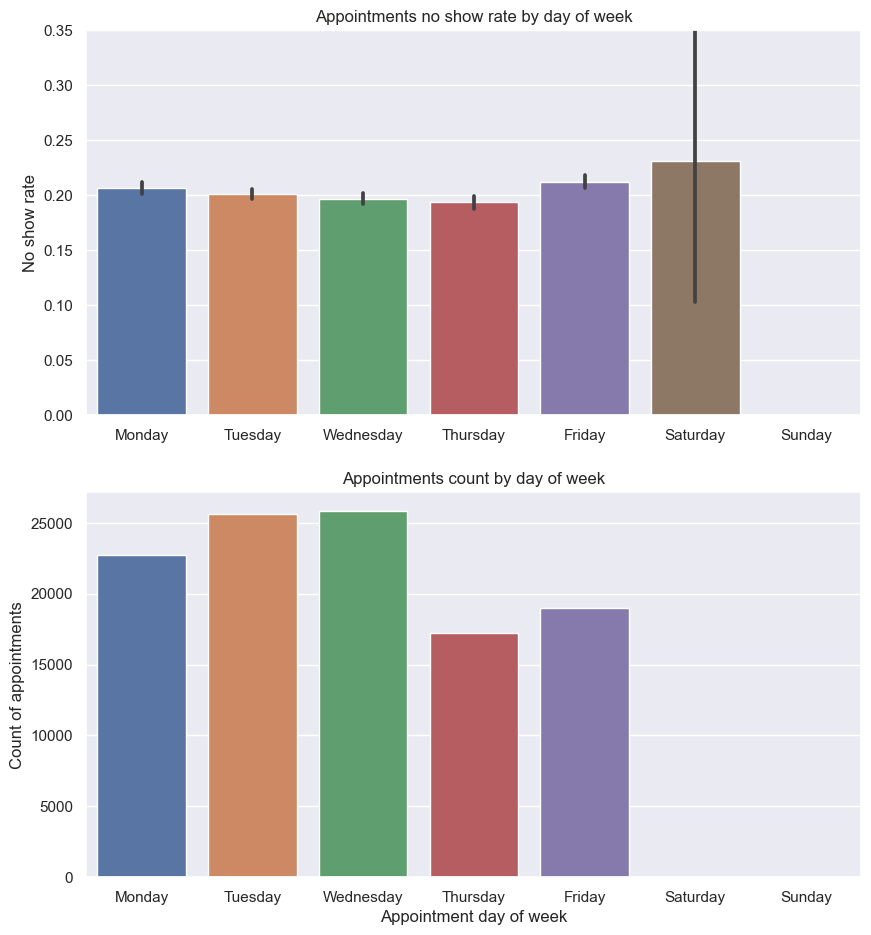

In [150]:
week_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [10, 11])

plt.subplot(2, 1, 1)
g1 = sns.barplot(x = df['AppointmentDayOfWeek'], y = df['NoShow'], order = week_key)
g1.set(xlabel='', ylabel='No show rate', ylim=(0,0.35), title='Appointments no show rate by day of week')

plt.subplot(2, 1, 2)
g2 = sns.countplot(data = df, x = 'AppointmentDayOfWeek', order = week_key)
g2.set(xlabel='Appointment day of week', ylabel='Count of appointments', title='Appointments count by day of week')

plt.show()

### -- Results --

We can see the No show rate on Fridays is a bit higher than on Tue, Wed, or Thu, but it is very comparable to no show rate on Mondays.
So the favourite days for appointments are **Moday, Tuesday, and Wednesday** .

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1